# US Visa Prediction Project
life cycle of Machine Learning Project
* Understanding the problem definition 
* Data collection
* EDA (Exploratory Data Analysis)
* Data Cleaning 
* Data Preprocessing
* Model training 
* Choose best model

### About
The immigration and Nationality Act(INA) of the USA permits foreign workers to come to the united states to work on either a temporary or permanent basis . The act also protects US workers against advertise impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of the Foreign labor Certification(OFLC)

## 1) Problem Statement
* OFLC gives job certification application for employers seeking to bring foreign workers into the united states and grants certifications.
* As in last year the count of employees were huge so OFLC needs Machine Learning models to shortist visa application based on their previous data

In this project we are going to use the data given to build a Classification model:
* This model is to check if Visa get approved or not based on given dataset
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified of denied based on the certain crieteria which influence the decision


## 2) Data collection

* The Daaset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 rows and 12 columns 
https://www.kaggle.com/datasets/moro23/easyvisa-dataset

2.1) Import Data and Required Packages

* Importing pandas , numpy , matplotlib , seaborn and warning libraries


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline



In [10]:
df = pd.read_csv("visadataset.csv")

In [11]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
df.shape

(25480, 12)

In [13]:
# display summary statical analysis of the dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [14]:
# check nul and dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


3. Exploring Data

In [18]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("\n we have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

 we have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [19]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("-----------------------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------------------

### insights 
* `case_id` have some unique values for each column which can be dropped as it is of no importance
* `continent` column is highly biased towards asia . henxe we can combine other categories from a single category 
* `unit_of_wage` seems to be and important column as most of them are yearly contracts

# Univariate analysis
* The term univariate analysis refers to the analysis of one variable prefix `uni`  means `one` . The purpose of the univariate analysis is to understand the distribution of values for single variable

# The other type of analysis are
1. Bivariate Analysis : The analysis of two variables
2. Multivariate Analysis : The analysis of two or more variables 

# Numerical Features

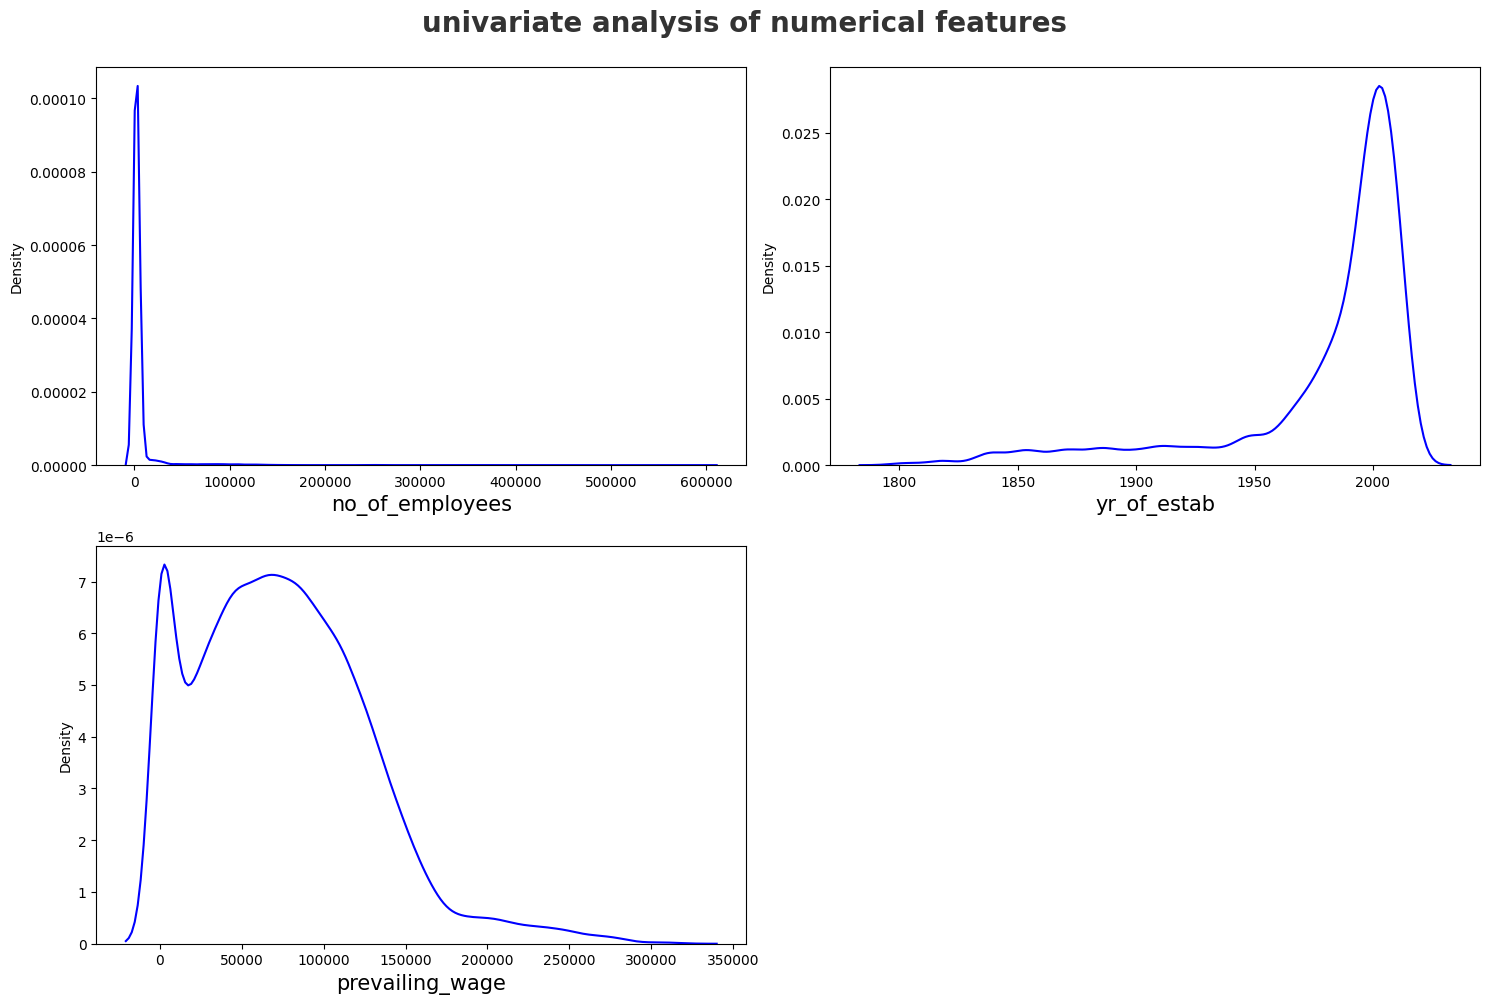

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle('univariate analysis of numerical features' , fontsize=20 ,fontweight='bold' , alpha=0.8 , y = 1.)

for i in range(0 , len(numeric_features)):
    plt.subplot(2 , 2 , i+1)
    sns.kdeplot(x=df[numeric_features[i]] , color ="blue")
    plt.xlabel(numeric_features[i] , fontsize=15)
    plt.tight_layout()
# save plot
# plt.savefig('images/univariate_analysis.png')

#### insights 
* `no_of_employees` columns looks like more skewed but it may be becaue outlies
* `yr_of_estab` is a discrete feature 
* `pribaillin-wage` is a right skewed distribution

### Categorical Features

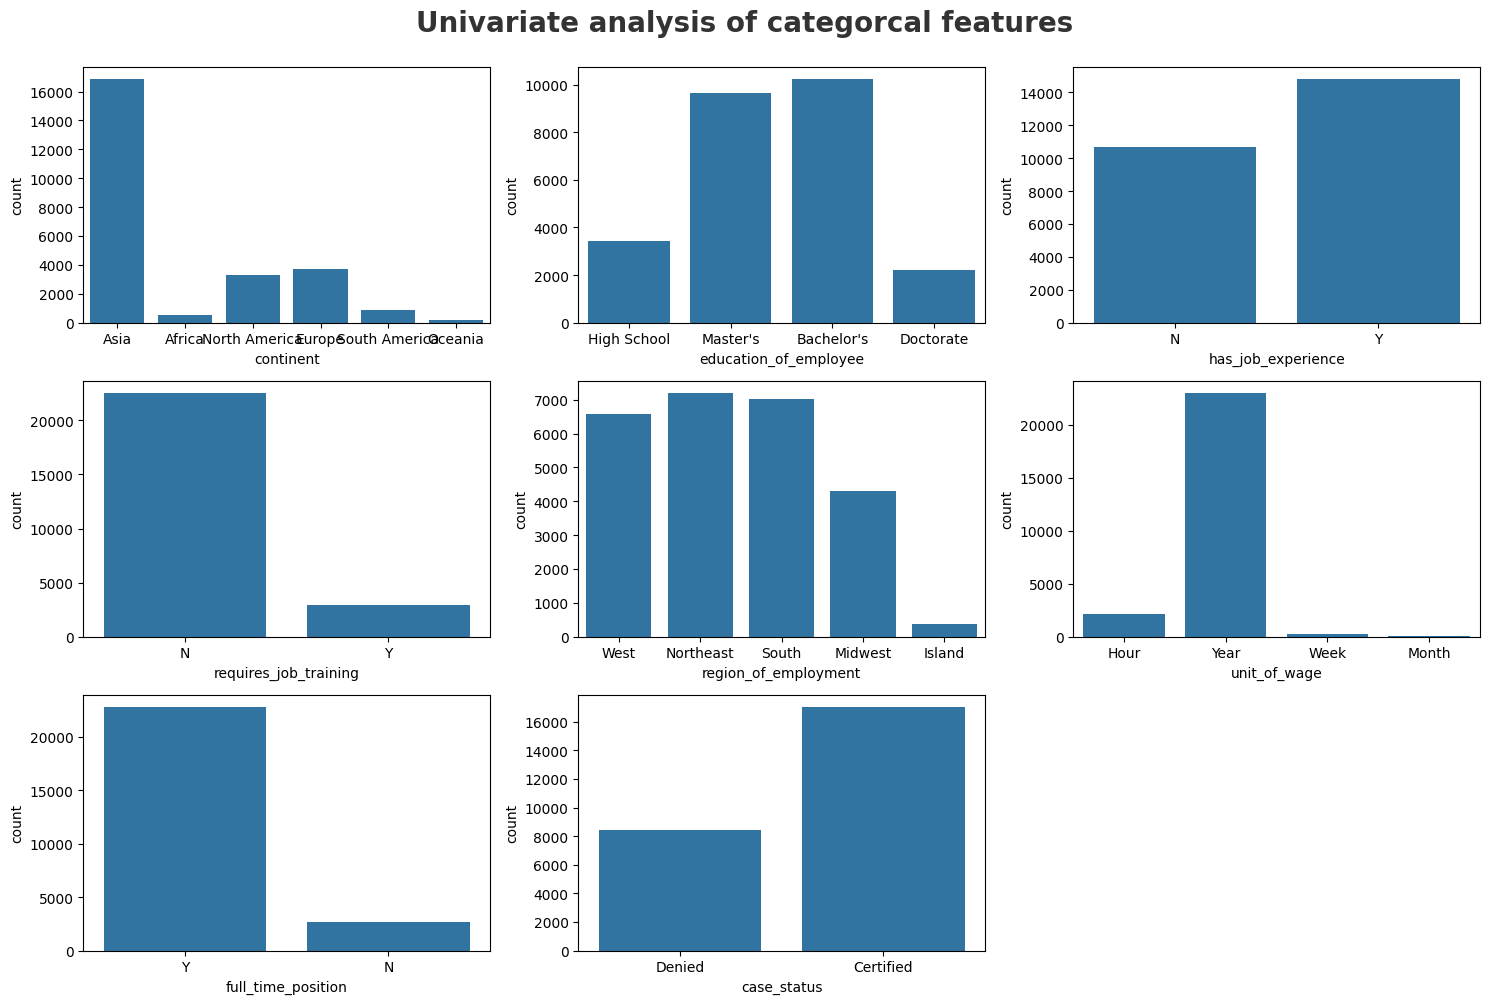

In [ ]:
# Categorical columns
# categorical_features.remove("case_id")  # remove case_id from categorical features
plt.figure(figsize=(15,10))
plt.suptitle('Univariate analysis of categorcal features' , fontsize=20 ,fontweight='bold' , alpha=0.8 , y = 1.)

for i in range(0 , len(categorical_features)):
    plt.subplot(3,3, i+1)
    sns.countplot(x = df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
# save plot
# plt.savefig('images/univariate_analysis_categorical.png')

####INSIGHTS 
* `requires_job_training` , `unit_of_wate` , `full_time_position` and `continents` columns have single cateegory domination 
* in rest of columns are balanced

## Multivariate Analysis
*  Multivariate analysis is the analisis of more than one variable

In [32]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]

continous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

print("We have {} discrete features : {}".format(len(discrete_features), discrete_features))
print("\n we have {} continous features : {}".format(len(continous_features), continous_features))  

We have 0 discrete features : []

 we have 3 continous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Check Multicollinearity in Numerical Features


In [33]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
